# Atividade 1

Lucas R. Ximenes dos Santos - 11917239

---

Considere a base de dados contida no arquivo `Stars.cvs`, disponível para download na página da disciplina no Moodle, sobre as características observadas de um conjunto de 240 estrelas.
Elabore um código em Python para o processamento desses dados de forma a responder as seguintes questões

# 1. Como os dados devem ser preparados para o processamento?

Iniciamos nossa análise importando os dados dos arquivos [Stars.csv](https://raw.githubusercontent.com/Jimeens/Permanent_Files/refs/heads/main/PGF5393/Atividade1/Stars.csv) e [Categorias.csv](https://raw.githubusercontent.com/Jimeens/Permanent_Files/refs/heads/main/PGF5393/Atividade1/Categorias.csv). Para isso, importamos a biblioteca `pandas`. Para facilitar, foi criado um diretório no GitHub para armazenar estes dados e importá-los de forma mais simples.

In [137]:
if 'google.colab' in str(get_ipython()):
  !git clone https://github.com/Jimeens/Permanent_Files.git

fatal: destination path 'Permanent_Files' already exists and is not an empty directory.


In [138]:
import pandas as pd

dS=pd.read_csv('/content/Permanent_Files/PGF5393/Atividade1/Stars.csv')
dC=pd.read_csv('/content/Permanent_Files/PGF5393/Atividade1/Categorias.csv')

dS

,Star,Temperature,L,R,A_M,Color,Spectral_Class
0,1,3068,0.002400,0.1700,16.12,Red,M
1,2,3042,0.000500,0.1542,16.60,Red,M
2,3,2600,0.000300,102.0000,18.70,Red,M
3,4,2800,0.000200,0.1600,16.65,Red,M
4,5,1939,0.000138,103.0000,20.06,Red,M
...,...,...,...,...,...,...,...
235,236,38940,374830.000000,1356.0000,-9.93,Blue,O
236,237,30839,834042.000000,1194.0000,-10.63,Blue,O
237,238,8829,537493.000000,1423.0000,-10.73,White,A
238,239,9235,404940.000000,1112.0000,-11.23,White,A


Antes de começar a preparar os dados, uma verificação curial é em relação à existência ou não valores ausentes nas duas tabelas, pois caso exista algum, é necessário fazer uma análise a mais nos dados. Na tabela `dS`:

In [139]:
 print("Valores ausentes na tabela Stars.csv:")
 print(dS.isnull().sum())

Valores ausentes na tabela Stars.csv:
Star              0
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


e na tabela `dC`:

In [140]:
print('Valores ausentes em Categorias.csv:')
print(dC.isnull().sum())

Valores ausentes em Categorias.csv:
Star    0
Type    0
dtype: int64


Concluindo que não existem valores ausentes em nenhuma delas e portanto a análise pode ser desenvolvida diretamente.

Ao olha para tabela, vemos que a coluna `Star` é um identificador desnecessário, de modo que para anonimizar os dados, removemos esta coluna. Além disso, temos 4 variáveis numéricas (`Temperature`, `L`, `R` e `A_M`) e 2 variáveis categóricas (`Color` e `Spectral_Class`), tal que podemos separá-las em duas listas independentes.

In [141]:
dS = dS.drop(columns = ['Star'])

varNum = ['Temperature', 'L', 'R', 'A_M']
varCat = ['Color', 'Spectral_Class']

Em relação às variáveis numéri`Temperature` $\in[1939, 40000]$, a variável `L` $\in[0.000080, 849420.0]$, a variável `R` $\in [0.008400, 6237.0]$ e a variável `A_M` $\in [-7346.0, 14776.0]$.

In [142]:
dS.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107200.578572,415.982944,121.369458
std,9552.425037,179424.946945,963.239600,2089.328079
min,1939.000000,0.000080,0.008400,-7346.000000
25%,3344.250000,0.000865,0.195025,-6.342500
50%,5776.000000,7.960000,18.000000,10.515000
75%,15055.500000,198050.000000,277.500000,14.097500
max,40000.000000,849420.000000,6237.000000,14776.000000


Esta grande variação de escala sugere um reescalonamento destes dados, o que será comentado em mais detalhes no item 2.

Uma análise inicial a ser feita é em relação à variável `A_M`. Em relação aos dados presentes nesta coluna, aproximadamente 95% possui duas casas decimais e estão em torno de um intervalo $[-10, 20]$, porém, existem alguns dados que são $> 100$ e $< -100$ (|`A_M`| $> 100$), que são números inteiros maiores que $1000$, o que sugere uma inconsistência nestes valores. Para isso importamos a biblioteca `numpy`

In [143]:
import numpy as np

bigA_M = np.abs(dS['A_M'])
countBigA_M = (bigA_M > 100).sum()

print(f"{100 * (240 - countBigA_M)/240:.3f}% estão abaixo de |A_M|<100")
bigA_MStars = dS[bigA_M > 100][['A_M']]

bigA_MStars

94.583% estão abaixo de |A_M|<100


,A_M
14,11782.0
91,6506.0
92,6228.0
161,-6245.0
193,12854.0
195,13667.0
199,14776.0
216,1236.0
223,-5975.0
226,-7262.0


Para corrigi-los, impomos uma condição de divisão por um fator $1000$.

In [144]:
dS['A_M'] = np.where(np.abs(dS['A_M']) > 100, dS['A_M'] / 1000, dS['A_M'])

Em relação às variáveis categóricas, há uma inconsistência nos dados da variável `Color`. Existem dados que representam a mesma categoria, mas que estão escritas de forma diferente, por exemplo, a opção `Blue Color` pode ser encontrada também nas formas `Blue-Color`, `Blue-color` e `Blue color`, o que pode gerar inconsistências futuras na hora de analisar os dados. Faremos então um remapeamento desta variável levando em conta inconsistências de escrita e, como estamos lidando com cores, proximidades de tons.

In [145]:
color_map = {
  'Red': 'Red',
  'Orange': 'Orange',
  'Orange-Red': 'Orange',
  'Pale yellow orange': 'Orange',
  'Yellowish': 'Yellow',
  'yellowish': 'Yellow',
  'Yellowish White': 'Yellowish_White',
  'yellow-white': 'Yellowish_White',
  'White-Yellow': 'Yellowish_White',
  'Whitish': 'White',
  'White': 'White',
  'white': 'White',
  'Blue': 'Blue',
  'Blue White': 'Blue_White',
  'Blue white': 'Blue_White',
  'Blue-white': 'Blue_White',
  'Blue-White': 'Blue_White'
 }

dS['Color'] = dS['Color'].map(color_map).fillna(dS['Color'])

Com este remapeamento, podemos verificar que o número de tipos de `Color` e a quantidade de `Spectral_Class` são os mesmos e que devem possuir uma forte correlação, pois as quantidades são muito similares, principalmente para `Color = Red` e `Color = Blue_White`, que possuem muitos dados. Podemos então assumir que como uma é equivalente à outra, uma das duas colunas pode ser descartada para simplificação da análise. Neste caso, como os dados de `Color`, originalmente, são inconsistentes e são relativamente difíceis de lidar, pois o nome de uma cor pode ser vista de diversas formas diferentes (ex.: considerar o que é laranja amarelado, laranja e laranja avermelhado acaba sendo um pouco complicado, pois não conseguimos de fato separar o que é mais laranja, mais amarela ou mais vermelho apenas olhando), pode ser interessante retirar esta coluna, de modo que a tabela `dS` vai possuir apenas as colunas `Temperature`, `L`, `R`, `A_M` e `Spectral_Class`.

In [146]:
dS = dS.drop(columns = ['Color'])

Levando em conta que iremos utilizar o método PCA e formaremos *clusters*, é necessário converter os dados categóricos remanescentes na tabela em valores numérico. Então, para realizar a conversão da variável `Spectral_Class`, podemos utilizar o codificador `OneHotEncoder(sparse_output = False)` da biblioteca `sklearn`, cujo argumento interno é usado para retornar uma matriz densa onde todos os valores binários são explicitamente armazenados.

In [147]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encodedClass = encoder.fit_transform(dS[['Spectral_Class']])
encodeddS = pd.DataFrame(encodedClass, columns=encoder.get_feature_names_out())

encodeddS

,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Quais as variáveis devem ser reescalonadas e por qual método?

Devido à alta diferença de escala nos dados da lista `varNum`, é necessária a realização de um reescalonamento destas variáveis. Primeiro, podemos aplicar uma transformação logarítmica nas variáveis `L` e `R` devido à grande assimetria dos dados nelas contidos, onde somamos uma quantidade insignificante $1.0 \cdot 10^{-10}$ para evitar possíveis casos de $\log(0)$ (que não ocorrem aqui, mas é importante se considerar).

In [148]:
dSNum = dS[varNum].copy()

dSNum['L'] = np.log10(dSNum['L'] + 1e-10)
dSNum['R'] = np.log10(dSNum['R'] + 1e-10)

Em seguida, podemos de fato fazer o reescalonamento das variáveis, onde será usado o método `StandardScaler()`, afim de padronizar a média em $0$ e a variância em $1$. A escolha deste método é devido à sua adequação para aplicação do PCA e da clusterização, lidando bem com distribuições não normais e possíveis *outliers*.

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledNum = scaler.fit_transform(dSNum)
scaledNumdS = pd.DataFrame(scaledNum, columns = varNum)

X = pd.concat([scaledNumdS, encodeddS], axis = 1)

X

,Temperature,L,R,A_M,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.888096,-0.950995,1.110457,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.782110,-1.061480,-0.974683,1.156078,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.828477,-1.117944,0.602446,1.355673,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.807496,-1.162761,-0.965717,1.160831,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.897819,-1.203776,0.604815,1.484934,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
235,2.983743,1.197284,1.230755,-1.365464,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,2.133913,1.285690,1.199858,-1.431996,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,-0.175029,1.237125,1.242467,-1.441500,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,-0.132438,1.205825,1.182580,-1.489022,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Aplique a redução de variáveis pelo método PCA e determine o número de componentes necessárias para se explicar, pelo menos, 90% da variância dos dados

Para aplicar o método PCA, precisamos importá-lo da biblioteca `sklearn`. Para visualização da quantidade de variáveis que explicam pelo menos 90% da variância dos dados, podemos importar a biblioteca `matplotlib`.

In [150]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Feito isso, somos capazes de aplicar a redução de variáveis pelo método PCA. Primeiro criamos uma instância do PCA, em seguida ajustamos o modelo PCA aos dados de `X`, calculando as componentes principais com suas variâncias e por fim transformas os dados originais de `X` para o espaço das componentes principais `x`.

In [151]:
pca = PCA()
pca.fit(X)
x = pca.transform(X)

Feita a transformação dos dados, podemos determinar a quantidade de variáveis que vão determinar ao menos 90% da variância dos dados. Começamos obtendo a proporção de variância explicada por cada componente principal, seguindo da soma cumulativa destas proporções (explicabilidade). Com isso podemos encontrar o número de componentes necessárias para atingir mais de 90% da variância

In [152]:
propVarExpl = pca.explained_variance_ratio_
explainability = propVarExpl.cumsum()
factors = np.arange(1, x.shape[1] + 1, 1)
p = factors[explainability < 0.9].max() + 1
if p < 2:
    p = 2

print(f"90% dos dados são explicados por {str(p)} componentes")

90% dos dados são explicados por 4 componentes


Que podemos ver graficamente

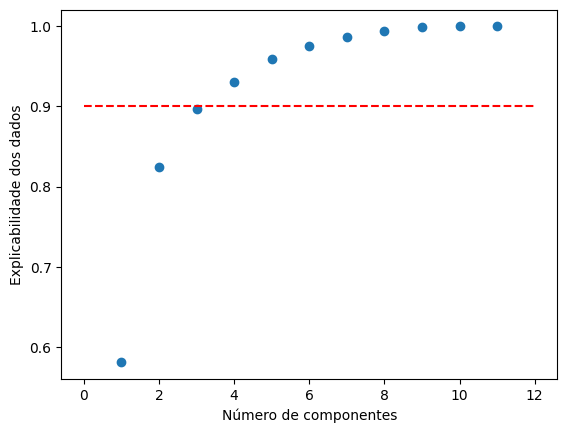

In [153]:
plt.scatter(factors, explainability)
plt.hlines(0.9, 0, 12,'r', linestyle = '--')
plt.xlabel('Número de componentes');
plt.ylabel('Explicabilidade dos dados');

# 4. Olhando as três primeiras componentes principais do PCA, quais as variáveis da tabela são mais importantes para o agrupamento dos dados?

Podemos ver as três primeiras componentes principais do PCA utilizando a biblioteca `pandas`. Destas componentes, é possível identificar as variáveis mais importantes selecionando valores absolutos das componentes principais do PCA mais altos

In [154]:
pcaComponents = pd.DataFrame(pca.components_[0:3].T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

abs(pcaComponents)

,PC1,PC2,PC3
Temperature,0.332925,0.730708,0.458173
L,0.585445,0.065731,0.335921
R,0.425175,0.542428,0.689673
A_M,0.578364,0.046945,0.439852
Spectral_Class_A,0.004354,0.012189,0.048415
Spectral_Class_B,0.010021,0.218581,0.005799
Spectral_Class_F,0.023540,0.021188,0.037369
Spectral_Class_G,0.002907,0.003656,0.004012
Spectral_Class_K,0.006852,0.020092,0.003542
Spectral_Class_M,0.119179,0.326802,0.028266


Na primeira componente do PCA (`PCA_1`), as variáveis da tabela `X` que são dominantes são `L`, `A_M`, `R` e `Temperature` ($>0.3$), na componente `PCA_2`, as variáveis dominantes são `Termperature`, `R`, `Spectral_Class_M` e `Spectral_Class_B` ($>0.3$) e na última componente principal do PCA, as variáveis mais importantes são `R`, `Temperature`, `A_M` e `L` ($>0.3$). Podemos então estabelecer que para um *threshold* igual a $0.3$ as variáveis mais importantes para o agrupamento dos dados são principalmente as numéricas `Temperature`, `L`, `R` e `A_M`, mas sem excluir a importância das duas variáveis categóricas que demonstraram importância na segunda componente principal do PCA. Estas duas variáveis podem ser entendidas como importantes na componente do PCA devido à grande quantidade de estrelas classificadas pelas classes `M` e `B`.

Determinadas as variáveis mais importantes para explicar no mínimo 90% da variância dos dados (que são as variáveis numéricas), podemos utilizar apenas a tabela que possui estes dados reescalonados e pré-processados, que é a tabela `scaledNumdS`.

# 5. Utilize o método de agrupamento hierárquico para agrupar as estrelas de acordo com suas características. Qual o número de agrupamentos ideal para análise desses dados?

A fim de utilizar o método de agrupamento hierárquico para agrupar as estrelas, podemos descobrir o número de agrupamentos ideal para análise de dados via `AgglomerativeClustering`, de modo que num *range* de 2 a 11 \textit{clusters}, podemos visualizar qual é este valor ideal de *clusters*.

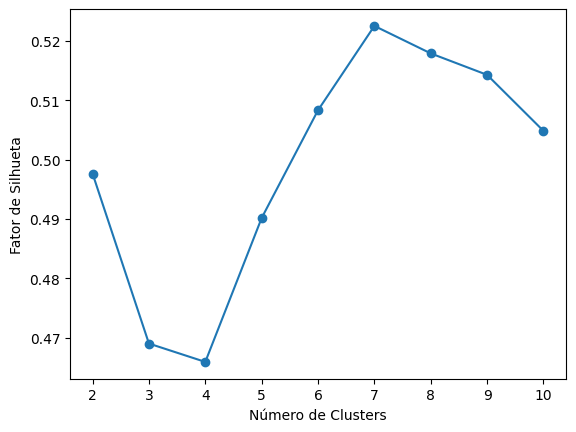

In [155]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

silHier = []
for n in range(2, 11):
    hier = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = hier.fit_predict(scaledNumdS)
    silHier.append(silhouette_score(scaledNumdS, labels))

plt.plot(range(2,11), silHier, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Fator de Silhueta')
plt.show()

cujo número ideal de *clusters* vai ser definido pelo maior fator de silhueta observado no gráfico, o que podemos gravar no comando

In [156]:
bestNumberClustersHier = list(range(2,11))[np.argmax(silHier)]

que, para este caso, guardará o valor `bestNumberClusterHier = 7`. Com isso podemos agrupar as estrelas em 7 *clusters*, de tal forma que os gráficos relacionando as características principais das estrelas são facilmente construídos.

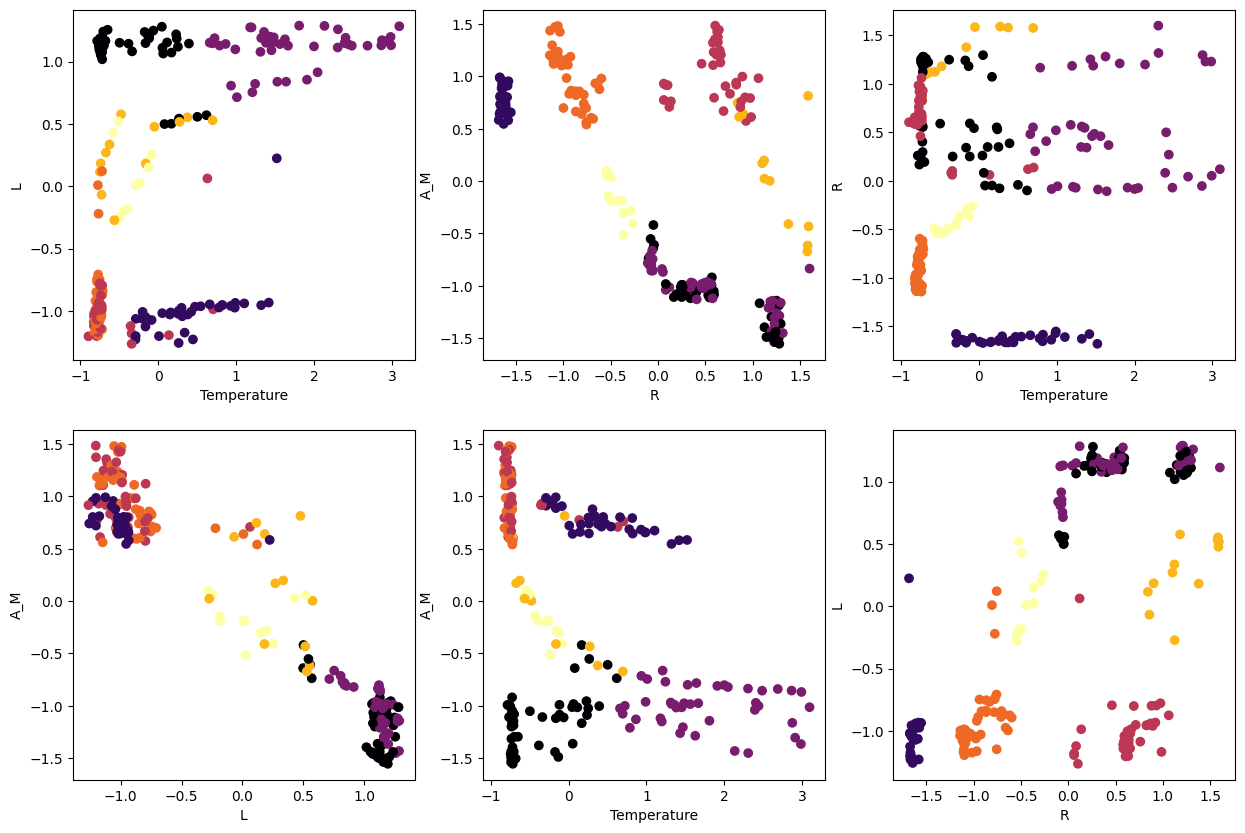

In [157]:
hierarchical = AgglomerativeClustering(n_clusters=bestNumberClustersHier, linkage='ward').fit(scaledNumdS)
categoriasHier = hierarchical.labels_

plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
    plt.subplot(2,3,i)
    plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categoriasHier, cmap='inferno')
    plt.xlabel(xVar)
    plt.ylabel(yVar)

# 6. Utilize o método KMeans para agrupar as estrelas de acordo com suas características. Qual o número de agrupamentos ideal para análise desses dados?

Em relação ao método KMeans para agrupar as estrelas de acordo com suas características, é necessário escolher um estado alatório (`random_state = `) para aplicação do KMeans, pois caso contrário, a análise não torna-se reprodutível, dado que para cada estado aleatório escolhido pelo próprio KMeans, a quantidade ótima de *clusters* vai sempre mudar, prejudicando a análise. Portanto, podemos escolher um `random_state = 2` (A escolha do `random\_state = 2` é feita com base na quantidade de tipos existentes na tabela `Categorias.csv`, pois a análise, *a posteriori*, indica que o número ideal de *clusters* é igual a 6. Foi estudada a possibilidade de diminuir a tolerância do KMeans (que por padrão é $0.0001$) para evitar que os gráficos se alterem a cada compilação, porém mesmo diminuindo até $10^{-20}$, sempre ocorria uma mudança no fator de silhueta, influenciando diretamente na quantidade de *clusters* e portanto na análise) na implementação do KMeans. Construímos então o fato de silhueta importando o `KMeans` da biblioteca `sklearn.cluster`.

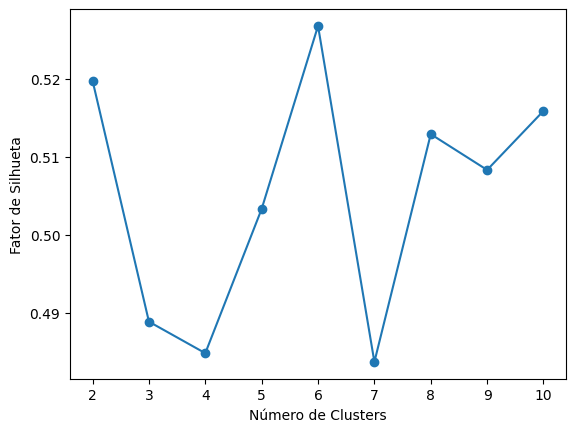

In [158]:
from sklearn.cluster import KMeans

silKMeans = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=2).fit(scaledNumdS)
    labels = kmeans.fit_predict(scaledNumdS)
    silKMeans.append(silhouette_score(scaledNumdS, labels))

plt.plot(range(2,11), silKMeans, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Fator de Silhueta')
plt.show()

Com isso, somos capazes de formar os *clusters* definindo uma variável que armazena o valor máximo do fator de silhueta e aplicando `n_clusters` igual a este valor.

In [159]:
bestNumberClustersKMeans = list(range(2,11))[np.argmax(silKMeans)]
print(bestNumberClustersKMeans)

6


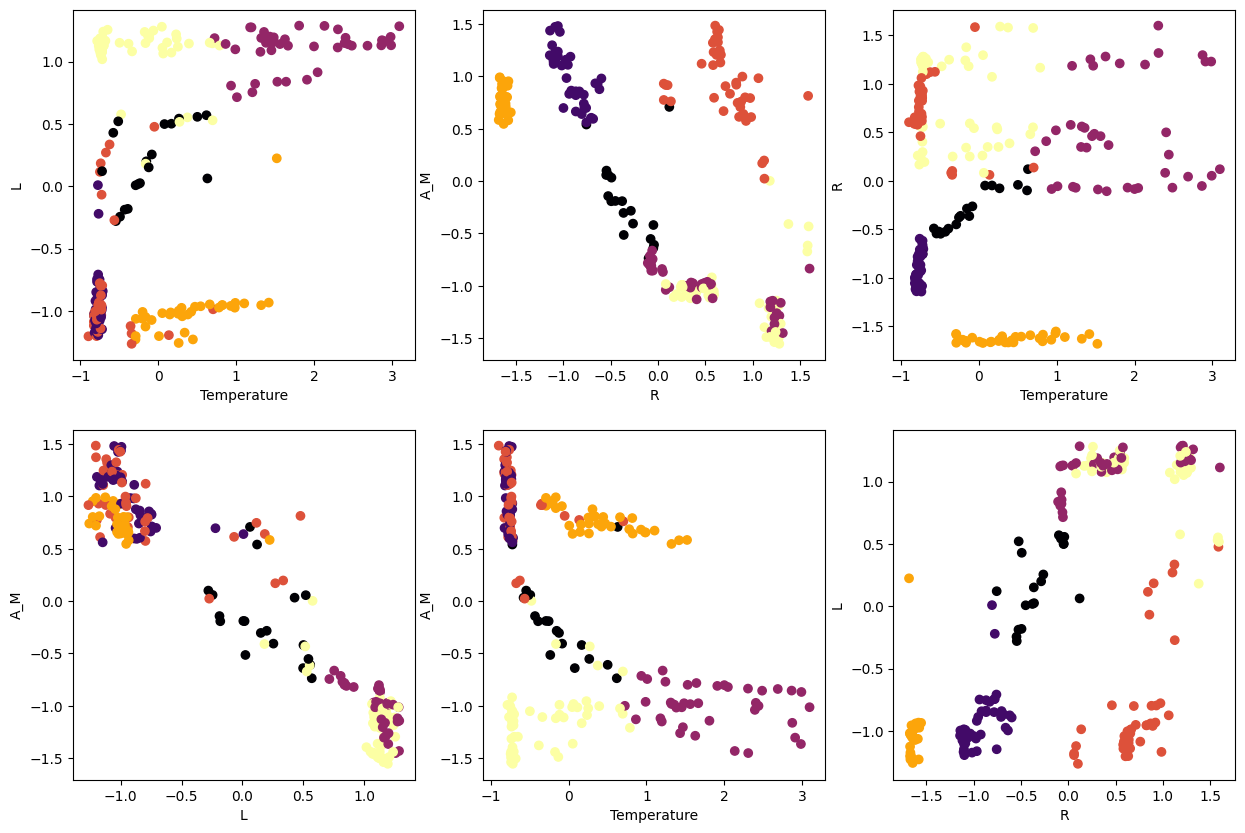

In [160]:
kmeans = KMeans(n_clusters=bestNumberClustersKMeans, random_state=2).fit(scaledNumdS)
categoriasKMeans = kmeans.labels_

plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
    plt.subplot(2,3,i)
    plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categoriasKMeans, cmap='inferno')
    plt.xlabel(xVar)
    plt.ylabel(yVar)

# 7. Utilize o método DBSCAN para agrupar as estrelas de acordo com suas características. Qual o número de agrupamentos obtido? Comente sobre a presença ou não de *outliers*

Para usar o DBSCAN, é necessário determinar valores de distância, $\varepsilon$, entre os pontos e o valor mínimo de amostras, $\text{min}_{N}$, que minimizem os *outliers*, mas que ainda haja a formação de *clusters* consistentes. Um bom chute dessas variáveis, após vários testes iniciais, é $\varepsilon = 0.695$ e $\text{min}_{N} = 11$.

Com esta configuração foram obtidos 27 *outliers* e 6 *clusters*, onde os *outliers* são os pontos em preto nos gráficos.

27 Outliers
6 Agrupamentos


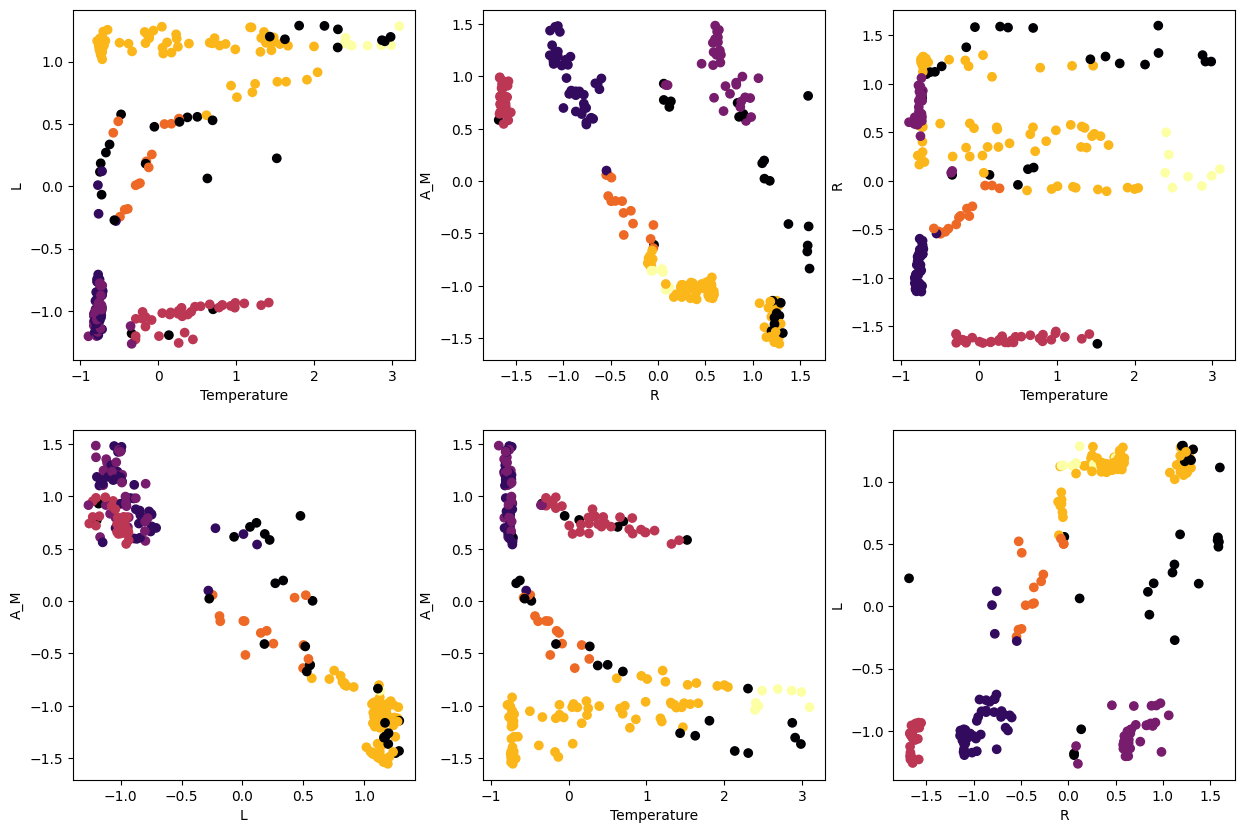

In [161]:
from sklearn.cluster import DBSCAN

epsilon = 0.695 # 0.63 = 35 outliers, 0.695 = 27
minN = 11 # 10 = 6 agrupamentos, 11 = 5

dbscan = DBSCAN(eps=epsilon, min_samples=minN).fit(scaledNumdS)
categoriasDBSCAN = dbscan.labels_

plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
  plt.subplot(2,3,i)
  plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categoriasDBSCAN, cmap='inferno')
  plt.xlabel(xVar)
  plt.ylabel(yVar)

print(str((categoriasDBSCAN == -1).sum())+' Outliers');
print(str(categoriasDBSCAN.max() + 1)+' Agrupamentos');

# 8. Faça uma análise sobre a performance geral dos algoritmos utilizados nos itens de 5 a 7 comparando com as categorias definidas manualmente e que podem ser encontradas no arquivo `Categorias.csv`

As categorias definidas manualmente na tabela `dC` podem ser visualizadas em *clusters*, onde cada tipo da variável `Type` vai definir um *cluster*, de modo que a visualização pode ser feita utilizando a biblioteca `seaborn`.

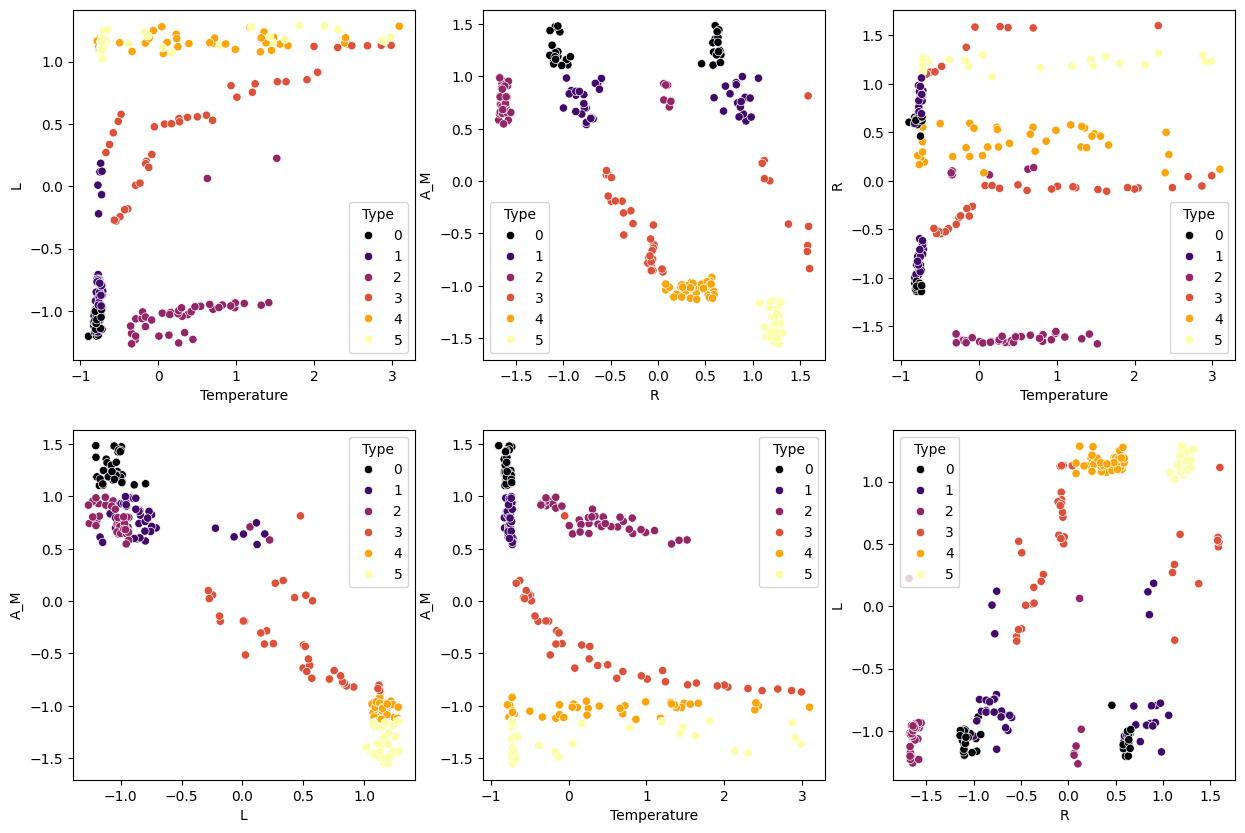

In [162]:
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, (x_feature, y_feature) in enumerate([('Temperature', 'L'), ('R', 'A_M'), ('Temperature', 'R'), ('L', 'A_M'), ('Temperature', 'A_M'), ('R', 'L')], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue=dC['Type'], data=scaledNumdS, palette='inferno')

Vemos aqui que os `clusters` são muito bem separados e de clara visualização. Em comparação com os agrupamentos feitos com agrupamento Hierárquico, KMeans e DBSCAN, podemos verificar o quão parecido os *clusters* são utilizando a métrica *Adjusted Rand Index* (ARI).

In [163]:
from sklearn.metrics import adjusted_rand_score

ariHierarchical = adjusted_rand_score(dC['Type'], categoriasHier)
ariKMeans = adjusted_rand_score(dC['Type'], categoriasKMeans)
ariDBSCAN = adjusted_rand_score(dC['Type'], categoriasDBSCAN)

print(f'ARI Hierárquico: {ariHierarchical:.3f}')
print(f'ARI KMeans: {ariKMeans:.3f}')
print(f'ARI DBSCAN: {ariDBSCAN:.3f}')

ARI Hierárquico: 0.396
ARI KMeans: 0.397
ARI DBSCAN: 0.406


Podemos ver então que os *clusters* formados pelos métodos de agrupamento hierárquico, KMeans e DBSCAN são relativamente inferiores (DBSCAN $>$ KMeans $>$ Hierárquico) quando comparados às categorias definidas manualmente, no entanto, alguns *clusters* obtidos por estes métodos são relativamente parecidos com os manuais.

Um comentário importante a ser feito é em relação ao uso do `random_state=2`no KMeans. Ao impormos isso, a *clusterização* fica única, porém ela pode não ser a melhor formação de *clusters* quando fazemos `kmeans = KMeans(n_clusters=bestNumberClustersKMeans, random_state=2).fit(scaledNumdS)`, dado que existe uma variedade de `random_state` que nos dão um valor ótimo de *clusters* igual a 6, mas todos eles acabam por ser diferentes e o ARI do KMeans vai sempre mudar.